<a href="https://colab.research.google.com/github/zlximon/Tensorflow_DL/blob/master/TransferLearning(feature_extraction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 #Get data (10% of 10 food classes from Food101) - https://www.kaggle.com/dansbecker/food-101 
import zipfile

# Download the data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_10_percent.zip")
zip_ref.extractall()
zip_ref.close()

--2022-05-18 15:58:35--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   149MB/s    in 1.1s    

2022-05-18 15:58:36 (149 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [2]:
import os 
for dirpath,dirnames,filenames in os.walk("10_food_classes_10_percent"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images is '{dirpath}'")

There are 2 directories and 0 images is '10_food_classes_10_percent'
There are 10 directories and 0 images is '10_food_classes_10_percent/train'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/chicken_curry'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/grilled_salmon'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/pizza'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/ice_cream'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/sushi'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/fried_rice'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/chicken_wings'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/steak'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/ramen'
There are 0 directories and 75 images is '10_food_classes_10_percent/train/hamburge

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SHAPE=(224,224)
BATCH_SIZE=32
train_dir = "10_food_classes_10_percent/train/"
test_dir = "10_food_classes_10_percent/test/"
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)
train_data_10p=train_datagen.flow_from_directory(train_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")
test_data=test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SHAPE,batch_size=BATCH_SIZE,class_mode="categorical")

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [4]:
#setting up callbacks 
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [5]:
#comparing 2 tensorflow models
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

efficientnet_url = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"
test= "https://tfhub.dev/tensorflow/efficientnet/b7/feature-vector/1"

In [6]:
import tensorflow as tf
import tensorflow_hub as hub


In [7]:
def create_model(model_url,num_classes=10): # this function takes the tensorflow hub model and turn it to sequential model  and it returns a uncompiled model
  feature_extractor_layer=hub.KerasLayer(model_url,trainable=False,input_shape=IMAGE_SHAPE+(3,)) # this is freeze the already learned patterns 
  model=tf.keras.Sequential([
  feature_extractor_layer,
  tf.keras.layers.Dense(num_classes,activation="softmax",name="output_layer")                             
  ])
  return model 

#creating and test  Resnet model and 

In [ ]:
#create Resnet model 
resent_model=create_model(resnet_url,num_classes=train_data_10p.num_classes)#=10


In [ ]:
resent_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 2048)              23564800  
                                                                 
 output_layer (Dense)        (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [ ]:
resent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])


In [ ]:
history1=resent_model.fit(train_data_10p,epochs=5,steps_per_epoch=len(train_data_10p), validation_data=test_data,validation_steps=len(test_data),callbacks=[create_tensorboard_callback(dir_name="tensorflwo-hub", experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflwo-hub/resnet50v2/20220518-082336
Epoch 1/5
24/24 [==============================] - 17s 697ms/step - loss: 0.8558 - accuracy: 0.7453 - val_loss: 0.8343 - val_accuracy: 0.7308
Epoch 2/5
24/24 [==============================] - 16s 671ms/step - loss: 0.5997 - accuracy: 0.8200 - val_loss: 0.7404 - val_accuracy: 0.7648
Epoch 3/5
24/24 [==============================] - 17s 729ms/step - loss: 0.4545 - accuracy: 0.8853 - val_loss: 0.6995 - val_accuracy: 0.7724
Epoch 4/5
24/24 [==============================] - 20s 841ms/step - loss: 0.3629 - accuracy: 0.9173 - val_loss: 0.6688 - val_accuracy: 0.7828
Epoch 5/5
24/24 [==============================] - 16s 694ms/step - loss: 0.2988 - accuracy: 0.9480 - val_loss: 0.6595 - val_accuracy: 0.7800


In [ ]:
resent_model.evaluate(test_data)

79/79 [==============================] - 13s 160ms/step - loss: 0.6595 - accuracy: 0.7800


[0.6594855189323425, 0.7799999713897705]

In [14]:
import matplotlib.pyplot as plt

# Plot the validation and training curves
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow History object.

  Returns:
    Plots of training/validation loss and accuracy metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # Plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend();

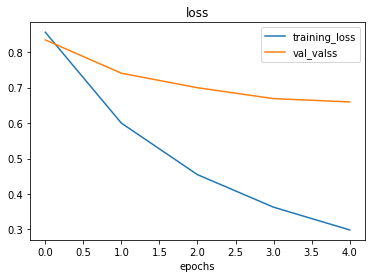

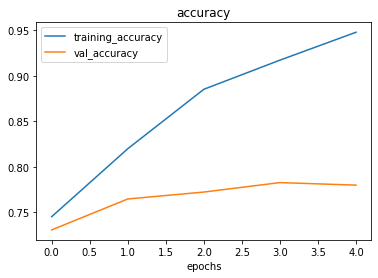

In [ ]:
plot_loss_curvse(history1)

#creating and testing EfficientNet model

In [8]:
efficient_model=create_model(efficientnet_url,10)

In [9]:
efficient_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [10]:
efficient_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])

In [ ]:
efficient_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [11]:
history2=efficient_model.fit(train_data_10p,epochs=10,steps_per_epoch=len(train_data_10p),validation_data=test_data,validation_steps=len(test_data)
,callbacks=[create_tensorboard_callback(dir_name="tensorflwo-hub", experiment_name="resnet50v2")])

Saving TensorBoard log files to: tensorflwo-hub/resnet50v2/20220518-155908
Epoch 1/10
24/24 [==============================] - 45s 958ms/step - loss: 1.9018 - accuracy: 0.3947 - val_loss: 1.3161 - val_accuracy: 0.7092
Epoch 2/10
24/24 [==============================] - 20s 836ms/step - loss: 1.0882 - accuracy: 0.7427 - val_loss: 0.8841 - val_accuracy: 0.8084
Epoch 3/10
24/24 [==============================] - 20s 852ms/step - loss: 0.7746 - accuracy: 0.8280 - val_loss: 0.7094 - val_accuracy: 0.8352
Epoch 4/10
24/24 [==============================] - 20s 836ms/step - loss: 0.6184 - accuracy: 0.8720 - val_loss: 0.6173 - val_accuracy: 0.8492
Epoch 5/10
24/24 [==============================] - 19s 826ms/step - loss: 0.5209 - accuracy: 0.8987 - val_loss: 0.5620 - val_accuracy: 0.8580
Epoch 6/10
24/24 [==============================] - 19s 833ms/step - loss: 0.4543 - accuracy: 0.9080 - val_loss: 0.5232 - val_accuracy: 0.8636
Epoch 7/10
24/24 [==============================] - 20s 838ms/step 

In [12]:
efficient_model.evaluate(test_data)

79/79 [==============================] - 15s 187ms/step - loss: 0.4471 - accuracy: 0.8708


[0.44710418581962585, 0.8708000183105469]

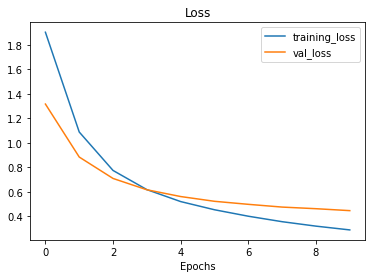

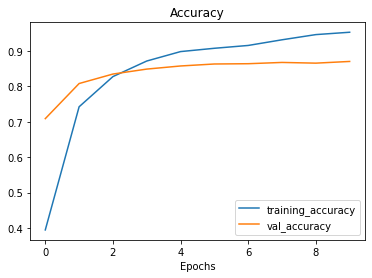

In [15]:
plot_loss_curves(history2)

#comparing 2 models 

In [18]:
!tensorboard dev upload --logdir ./tensorflow_hub/ \
  --name "EfficientNetB0 vs. ResNet50V2" \
  --description "Comparing two different TF Hub feature extraction models architectures using 10% of training images" \
  --one_shot

./tensorflow_hub/: No such directory.
User specified `one_shot` mode with an unavailable logdir. Exiting without creating an experiment.
